# Finding Heavy Traffic Indicators on I-94

In this project we're going to analyze a dataset about the westbound traffic on the I-94 interstate highway. We'll be using a mixture of exploratory and explanatory data visualizations to determine a few indicators of heavy traffic on I-94. Some examples that could cause heavier traffic are; weather, time of the day, day of the week, etc. Some of the tools we will be using for exploratory data visualization are;

- time series with line plots
- correlations with scatter plots
- frequency distributions with bar plots and histograms
- comparing graphs using grid charts

In [1]:
# import pandas 
import pandas as pd 
# read in csv file using pandas 
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
# examine first and last 5 rows with .head()/.tail()
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
# pandas .info() will provide more information about the dataset
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We have a complete dataset as we can see above, there is 48204 rows across 9 columns with no missing data. For the columns we have three data types; strings, floats, and ints - we also have no null values.

# Analyzing Traffic Volume

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data, also the station only records westbound traffic (cars moving from east to west). 

To start, we're going to plot a histogram to visualize the distribution of the traffic_volume column. Since we're using Jupyter notebook we'll have to import matplotlib inline which we will do now.

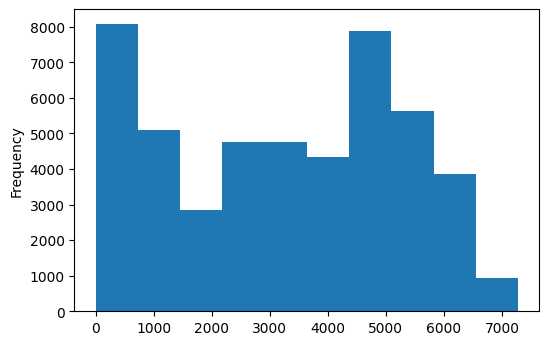

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline

traffic['traffic_volume'].plot.hist()

In [8]:
# lets take a look at a few statistics from the traffic_column
# using pandas describe() method
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

By using the describe method on the traffic_volume column we can see the following stats;

- the mean (average) traffic volume is 3259.8
- the max traffic volume is 7280
- the min traffic volume is 0


# Day time vs Night time traffic volume

In [9]:
# lets convert the date_time column to datatime data using pd.to_datetime()
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [12]:
traffic['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

Lets next split timeframes into day time and night time; day time will represent times between 7 AM and 7 PM while night time represent times between 7 PM and 7 AM.

In [17]:
day_time = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day_time.shape)

night_time = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night_time.shape)

(23877, 9)
(24327, 9)


As a quick note, we can see there is 450 more rows in night_time meaning that there is some times missing in day_time. 

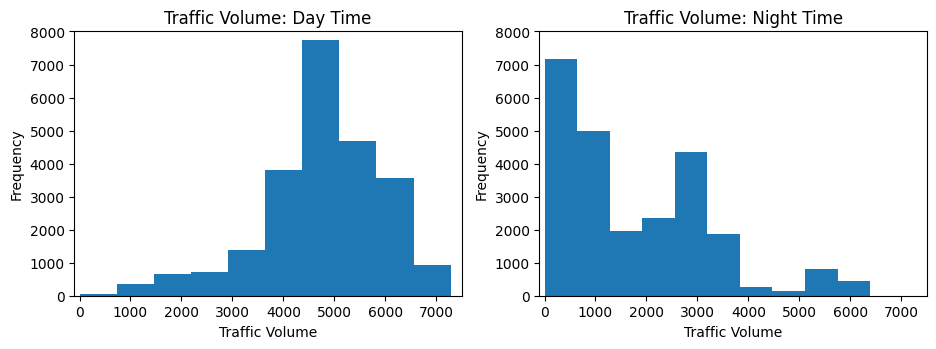

In [18]:
plt.figure(figsize=(11,3.5))

#day_time
plt.subplot(1,2,1)
plt.hist(day_time['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0,8000)
plt.title('Traffic Volume: Day Time')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

#night_time
plt.subplot(1,2,2)
plt.hist(night_time['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume: Night Time')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [19]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [20]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

After plotting histograms for both day_time & night_time, and running the describe method on both sets; day_time traffic is much higher on average compared to night_time traffic. Day_time traffic has a mean of 4752 while night_time has a mean of 1785. The max traffic_volume for day_time is 7280 while the max traffic_volume for night_time is 6386. 

# Time Indicators

Since we have determined that traffic during the day is heavier than at night, we can focus our analysis on traffic during the day. One possible indicator for heavy traffic is time, so we'll look at a few line plots showing how traffic volume changed according to; month, day of the week, and time of the day.

We can use the DataFrame.groupby() method to group certain time criteria together. We'll create a new column that provides the traffic_volume by month then generate a line plot to visualize traffic_volume across each month.

# Traffic Volume during the Day by Month

In [22]:
# create new column month
day_time['month'] = day_time['date_time'].dt.month

In [23]:
# groupby month and cast mean for the average traffic value for each month
by_month = day_time.groupby('month').mean()

In [24]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

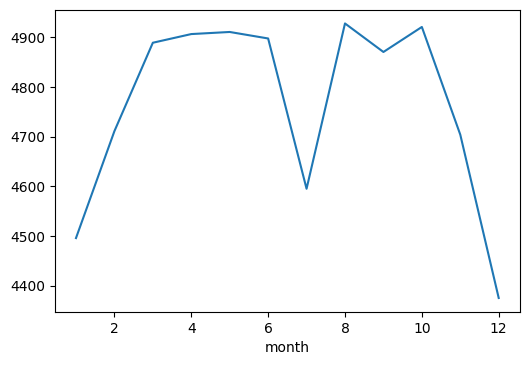

In [27]:
by_month['traffic_volume'].plot.line()

There is two steep drop offs for traffic during the day over the course of 12 months. Starting from January till March there is exponential increase in traffic volume which after the steep increase stalls at a high until July. During July there is an exponential decrease in traffic volume, followed by an exponential increase from August to September. From Novemeber to December there is an exponential decrease in traffic volume.

In my opinion these peaks and valleys could definitely be seasonal. During the summer there could be a drop off of traffic volume because kids are not in school. This could also prove true during Decemeber as kids are off for winter break. Another possibly reason that traffic volume drops during the summer is that people could be riding bicycles to work instead of driving.

# Traffic Volume during the Day by Day of the Week

In [35]:
# create a new column in day_time for 'dayofweek'
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek

In [38]:
# group by day of week and provide mean of each day
# 0 will be Monday, 6 will be sunday
by_dayofweek = day_time.groupby('dayofweek').mean()

In [39]:
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

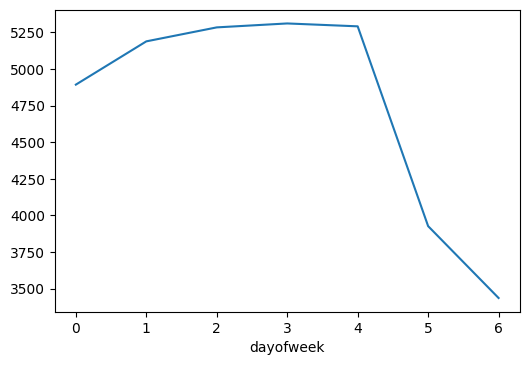

In [41]:
by_dayofweek['traffic_volume'].plot()


- Monday through Friday there is the largest amount of traffic volume during the day, Monday being slighty lower by not much compared to the rest of the week.
- There is a drop off in day time traffic during the weekends, most likely because people are off from work on the weekends as well as kids being off from school.
- Average traffic volume Monday-Friday : 5,193
- Average traffic volume Saturday-Sunday : 3,681

# Traffic Volume during the Day by Hour of the Day

In [42]:
# create a new column in day_time for hour of the day
day_time['hour'] = day_time['date_time'].dt.hour

In [47]:
# split days of the week into business days and weekend days
business_days = day_time.copy()[day_time['dayofweek'] <= 4]

# 4 represents Friday

weekend = day_time.copy()[day_time['dayofweek'] >= 5]

In [48]:
# group business days and weekends by hour
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

In [49]:
print(by_hour_business['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


In [50]:
print(by_hour_weekend['traffic_volume'])

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


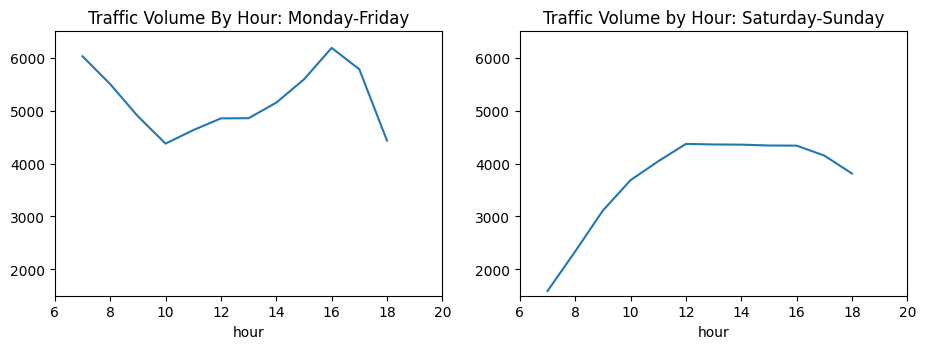

In [52]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday-Friday')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume by Hour: Saturday-Sunday')

plt.show()



- Traffic Volume by Hour: Monday-Friday

At the start of the business day line plot, we can see traffic at a high at 7 AM which is were our timeframe for day_time begins. There is a decrease in traffic after 7 AM till about 2 PM. After 2 PM there is a steady increase until 6 PM which is about the highest peak. We can conclude that rush hour is 7AM as well as between 4 and 6 PM.

- Traffic Volume by Hour: Saturday & Sunday

During the weekends, the average traffic volume peaks at 12 PM (noon) and is steady until a slight dropoff starting at 7PM. Also note that the peak of weekend traffic is near the low of traffic volume during the week.

# Weather Indicators

Next we're going to look at correlations between traffic_volume and weather columns. The weather columns we have to work with are as follows;

- temp
- rain_1h
- snow_1h
- clouds_all
- weather_main
- weather_description

In [53]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [54]:
# temp and traffic volume correlation
temp_corr = traffic['temp'].corr(traffic['traffic_volume'])
temp_corr

0.13029879817112658

In [63]:
# rain and traffic volume correlation
rain_corr = traffic['rain_1h'].corr(traffic['traffic_volume'])
rain_corr

0.00471370236785923

In [57]:
# snow and traffic volume correlation
snow_corr = traffic['snow_1h'].corr(traffic['traffic_volume'])
snow_corr

0.0007334345358283799

In [58]:
# clouds and traffic volume correlation
cloud_corr = traffic['clouds_all'].corr(traffic['traffic_volume'])
cloud_corr

0.06705377704283502

Temperature has the highest correlation to traffic_volume with a value of 0.13, the next highest correlation to traffic volume is clouds_all at 0.06.

# Weather Types

Since we did not find any reliable indicator for heavy traffic with numerical weather columns, we can see if we find more useful data with the categorical weather-related columns which are weather_main and weather_description.
We'll first groupby each column and get the mean, then plot both using a horizontal bar plot.

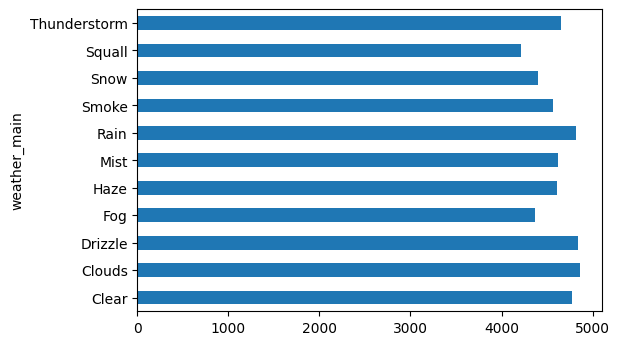

In [64]:
# grouping weather_main with the mean
by_weather_main = day_time.groupby('weather_main').mean()
# plotting by_weather_main on a horizontal bar plot
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Clouds has the highest amount of traffic volume which also had the highest correlation value. Drizzle and rain both are not far behind clouds. No weather category pushes traffic volume over 5000.

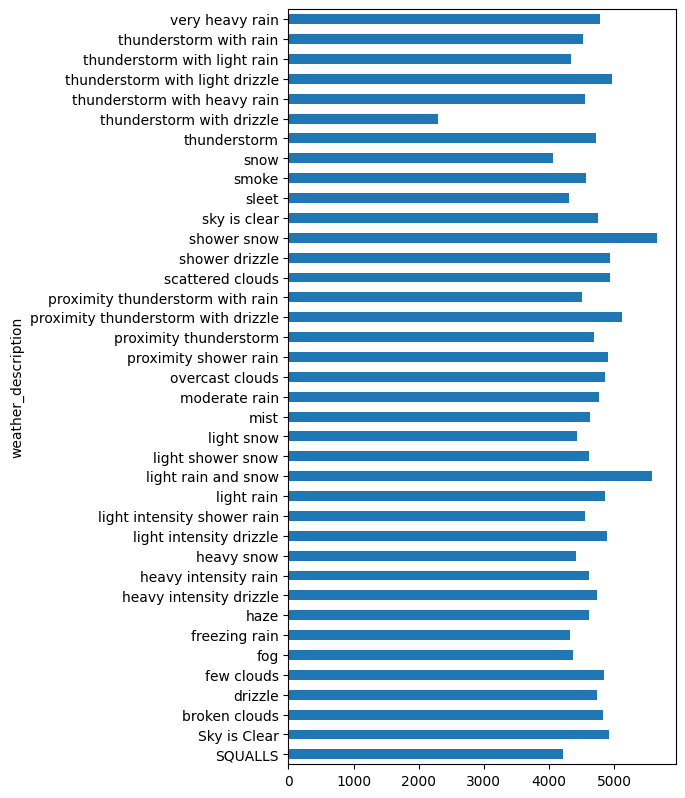

In [67]:
# grouping weather_description with mean
by_weather_description = day_time.groupby('weather_description').mean()
# plotting by_weather_description on horizontal bar plot
# we need to increase figsize due to the amount of unique values
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

There is three weather categories that cause traffic volume to exceed 5000 cars; light rain & snow, proximity thunderstorm with drizzle, and shower snow.

# Conclusion

Throughout the course of this project we uncovered a few things about heavy traffic on the I-94;

- Day time traffic (7AM - 7PM) is much greater than night time traffic, the mean day time traffic is 4762 cars while the mean night time traffic (7PM - 7AM) is 1785 cars.
- Weekday traffic (Monday-Friday) has peaks at 7AM and 3PM-6PM; 7AM the peak is 6000 cars while between 3PM-6PM cars on the road gradually increases from 5000 cars (3-4PM) to 6000 cars (6PM).
- Weekend traffic barley reaches the lows of non-rush hour weekday traffic which is around 4000-4500 cars; weekend traffic peaks at 12PM noon at approximately 4200-4300 cars.
- Traffic on the I-94 goes through seasonal trends which we covered, traffic is much lower during the summer time most likely due to kids being off from school as well as another drop during the winter months most likely due to winter break.
- The highest correlation between weather and traffic volume was the temp column with a correlation value of 0.13 followed by the clouds_all column with a correlation value of 0.06.
- The three weather categories that caused traffic volume to exceed 5000 cars were; light rain & snow, proximity thunderstorm with drizzle, and shower snow.